In [92]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spotify/dataset.csv


In [93]:
df = pd.read_csv('../input/spotify/dataset.csv')
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [94]:
def to_mins(arg):
    return arg / 60000
df['duration'] = df['duration_ms'].apply(to_mins)
df = df.drop('duration_ms',axis=1)

In [95]:
df

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,False,0.676,0.4610,1,...,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic,3.844433
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,False,0.420,0.1660,1,...,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic,2.493500
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,False,0.438,0.3590,0,...,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic,3.513767
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,False,0.266,0.0596,0,...,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic,3.365550
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,False,0.618,0.4430,2,...,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic,3.314217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,False,0.172,0.2350,5,...,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music,6.416650
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,False,0.174,0.1170,0,...,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music,6.416667
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,False,0.629,0.3290,0,...,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music,4.524433
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,False,0.587,0.5060,7,...,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music,4.731550


# **Аналитика**

In [96]:
print(df.shape[0])
print(df.isnull().sum())

114000
Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
duration            0
dtype: int64


**Удалим nan данные т.к. датасет достаточно большой, также опустим не важные столбца**


In [97]:
df = df.dropna()
df = df.drop(['Unnamed: 0','track_id','track_name'], axis=1)

In [98]:
df.describe()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration
count,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000
mean,33.238827,0.566801,0.641383,5.309126,-8.258950,0.637558,0.084652,0.314907,0.156051,0.213554,0.474066,122.147695,3.904034,3.800519
std,22.304959,0.173543,0.251530,3.559999,5.029357,0.480708,0.105733,0.332522,0.309556,0.190378,0.259261,29.978290,0.432623,1.788268
min,0.000000,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.143100
25%,17.000000,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218500,4.000000,2.901100
50%,35.000000,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000,3.548433
75%,50.000000,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.597500,0.049000,0.273000,0.683000,140.071000,4.000000,4.358433
max,100.000000,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000,87.288250


In [99]:
numerical_features = df.select_dtypes(include=['number']).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

In [100]:
print(numerical_features)
print(categorical_features)

['popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'duration']
['artists', 'album_name', 'track_genre']


In [101]:
print(df['track_genre'].unique())
print(len(df['track_genre'].unique()))

['acoustic' 'afrobeat' 'alt-rock' 'alternative' 'ambient' 'anime'
 'black-metal' 'bluegrass' 'blues' 'brazil' 'breakbeat' 'british'
 'cantopop' 'chicago-house' 'children' 'chill' 'classical' 'club' 'comedy'
 'country' 'dance' 'dancehall' 'death-metal' 'deep-house' 'detroit-techno'
 'disco' 'disney' 'drum-and-bass' 'dub' 'dubstep' 'edm' 'electro'
 'electronic' 'emo' 'folk' 'forro' 'french' 'funk' 'garage' 'german'
 'gospel' 'goth' 'grindcore' 'groove' 'grunge' 'guitar' 'happy'
 'hard-rock' 'hardcore' 'hardstyle' 'heavy-metal' 'hip-hop' 'honky-tonk'
 'house' 'idm' 'indian' 'indie-pop' 'indie' 'industrial' 'iranian'
 'j-dance' 'j-idol' 'j-pop' 'j-rock' 'jazz' 'k-pop' 'kids' 'latin'
 'latino' 'malay' 'mandopop' 'metal' 'metalcore' 'minimal-techno' 'mpb'
 'new-age' 'opera' 'pagode' 'party' 'piano' 'pop-film' 'pop' 'power-pop'
 'progressive-house' 'psych-rock' 'punk-rock' 'punk' 'r-n-b' 'reggae'
 'reggaeton' 'rock-n-roll' 'rock' 'rockabilly' 'romance' 'sad' 'salsa'
 'samba' 'sertanejo' 'show

**114 жанров, выборка хорошая**

In [102]:
df['track_genre'].value_counts()

track_genre
acoustic             1000
afrobeat             1000
psych-rock           1000
progressive-house    1000
power-pop            1000
                     ... 
emo                  1000
electronic           1000
electro              1000
world-music          1000
k-pop                 999
Name: count, Length: 114, dtype: int64

**Выборка ровная, всех жанров по 1000(1 удален вместе с nan)**

In [103]:
df['artists'].value_counts()

artists
The Beatles                                                                 279
George Jones                                                                271
Stevie Wonder                                                               236
Linkin Park                                                                 224
Ella Fitzgerald                                                             222
                                                                           ... 
Automatic Tasty                                                               1
o9                                                                            1
Pyotr Ilyich Tchaikovsky;National Philharmonic Orchestra;Richard Bonynge      1
tstewart;Ólafur Arnalds                                                       1
Jesus Culture                                                                 1
Name: count, Length: 31437, dtype: int64

<Axes: xlabel='explicit'>

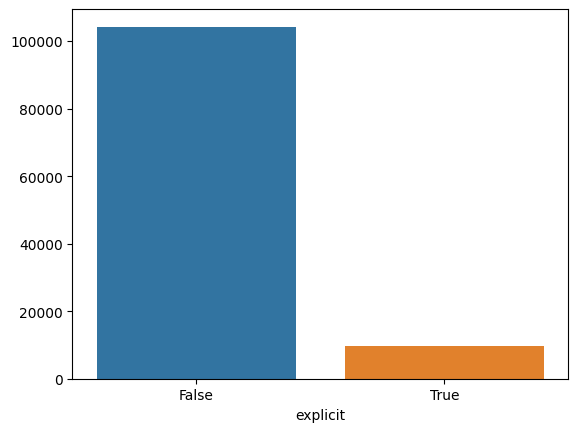

In [104]:
exp = df['explicit'].value_counts()
sns.barplot(x=exp.index,y=exp.values)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


Text(0.5, 1.0, 'mean popularity explicit')

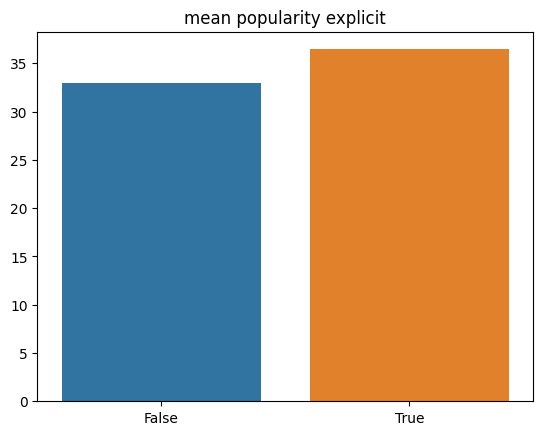

In [146]:
explicit = df[df['explicit'] == True]['popularity'].mean()
non_explicit = df[df['explicit'] == False]['popularity'].mean()

sns.barplot(x=['False','True'],y=[non_explicit, explicit]).set_title('mean popularity explicit')

**Не откровенных треков существенно больше, но их популярность в среднем немного больше**

In [106]:
means = list()
for i in df['track_genre'].unique():
    means.append(df[df['track_genre'] == i]['popularity'].mean())
means = pd.Series(data=means,index=df['track_genre'].unique())
print(means)

acoustic       42.483
afrobeat       24.399
alt-rock       33.943
alternative    24.337
ambient        44.191
                ...  
techno         39.042
trance         37.635
trip-hop       34.460
turkish        40.698
world-music    41.873
Length: 114, dtype: float64


Text(0.5, 1.0, 'genre mean popularity')

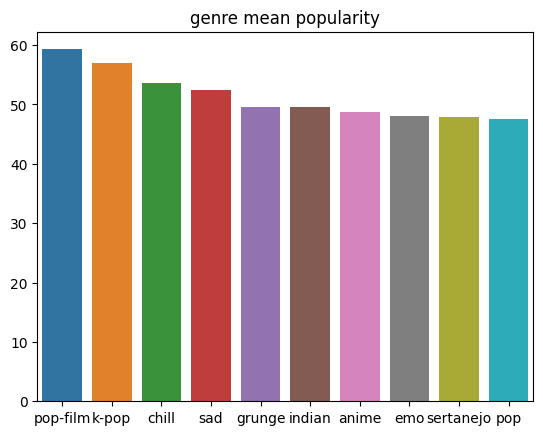

In [140]:
means_b10 = means.nlargest(10)
sns.barplot(x=means_b10.index,y=means_b10.values).set_title('genre mean popularity')

**Жанр музыки значительно влияет на популярность музыки, самая популярная музыка - та что нравятся молодежи, что логично, ведь они - основная аудитория spotify**

In [108]:
df['key'].value_counts()

key
7     13244
0     13061
2     11644
9     11313
1     10772
5      9368
11     9282
4      9008
6      7921
10     7456
8      7360
3      3570
Name: count, dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


Text(0.5, 1.0, 'key mean popularity')

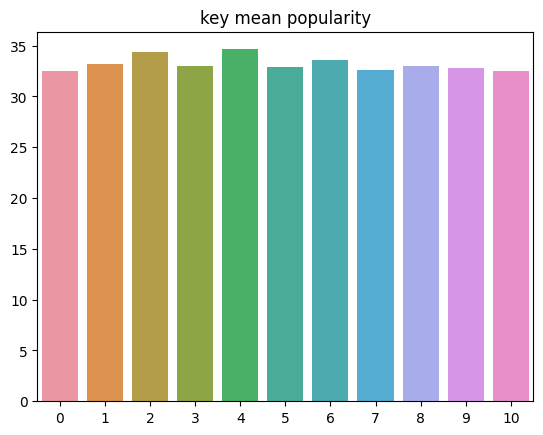

In [109]:
keys = list()
for i in range(11):
   keys.append(df[df['key'] == i]['popularity'].mean())
sns.barplot(x=list(range(11)),y=keys).set_title('key mean popularity')

**Разница в популярности по ключу незначительна.**

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

<Axes: ylabel='tempo'>

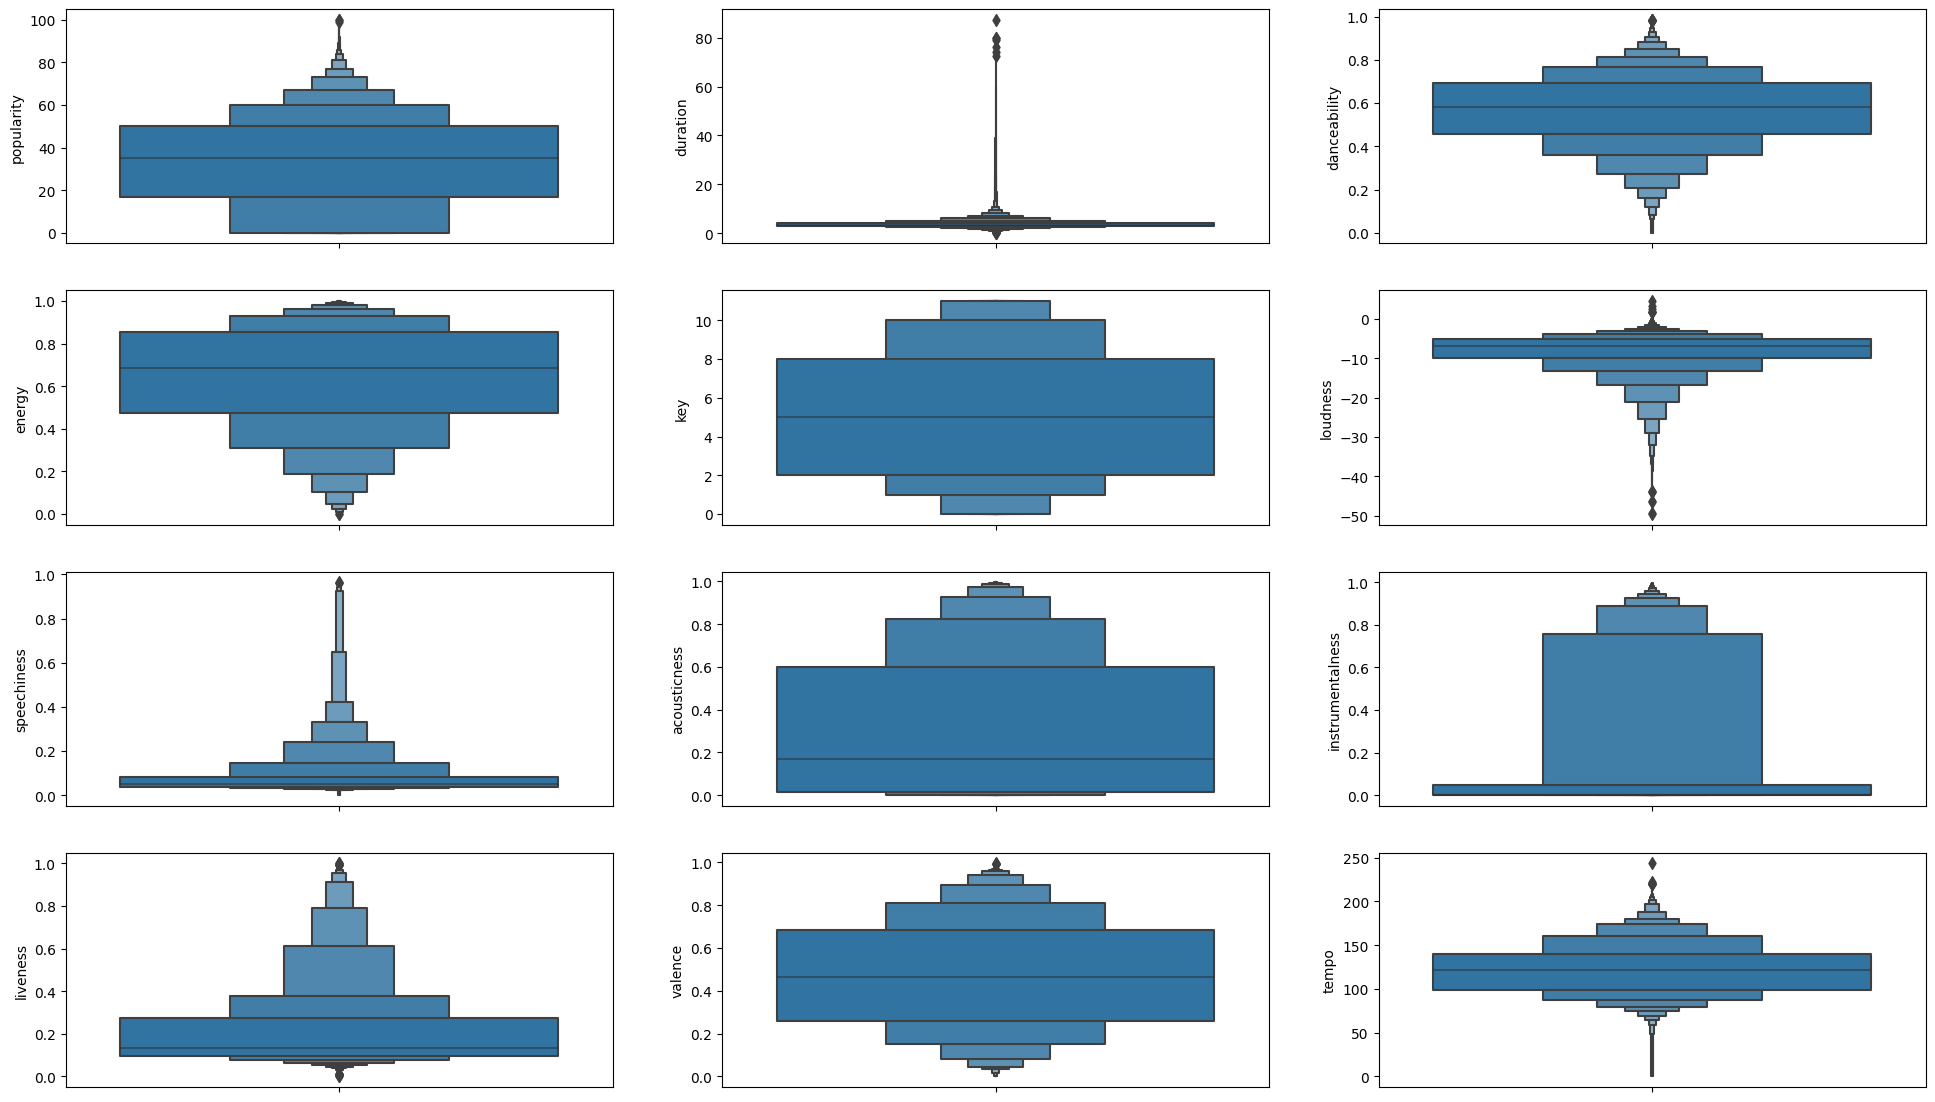

In [110]:
fig = plt.figure(figsize=(24,14))
gs = fig.add_gridspec(4,3)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])
ax6 = fig.add_subplot(gs[2,0])
ax7 = fig.add_subplot(gs[2,1])
ax8 = fig.add_subplot(gs[2,2])
ax9 = fig.add_subplot(gs[3,0])
ax10 = fig.add_subplot(gs[3,1])
ax11 = fig.add_subplot(gs[3,2])

sns.boxenplot(y=df['popularity'],ax=ax0)
sns.boxenplot(y=df['duration'],ax=ax1)
sns.boxenplot(y=df['danceability'],ax=ax2)
sns.boxenplot(y=df['energy'],ax=ax3)
sns.boxenplot(y=df['key'],ax=ax4)
sns.boxenplot(y=df['loudness'],ax=ax5)
sns.boxenplot(y=df['speechiness'],ax=ax6)
sns.boxenplot(y=df['acousticness'],ax=ax7)
sns.boxenplot(y=df['instrumentalness'],ax=ax8)
sns.boxenplot(y=df['liveness'],ax=ax9)
sns.boxenplot(y=df['valence'],ax=ax10)
sns.boxenplot(y=df['tempo'],ax=ax11)

**Странные выбросы в длительности и громкости, музыка длительностью более часа, а также треки громкостью менее -40, рассмотрим их подробнее**

In [111]:
display(df[df['duration'] >= 60])

,artists,album_name,popularity,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration
10935,Timo Maas,Crossing Wires 002 - Compiled And Mixed By Tim...,11,False,0.6970,0.632000,1,-12.469,1,0.0451,0.00815,0.8710,0.0998,0.15100,121.055,4,breakbeat,79.817100
10984,Timo Maas,Crossing Wires 002 - Compiled And Mixed By Tim...,11,False,0.6970,0.632000,1,-12.469,1,0.0451,0.00815,0.8710,0.0998,0.15100,121.055,4,breakbeat,79.817100
13195,Mark Farina,Greenhouse Construction,12,False,0.8460,0.744000,10,-9.260,0,0.0611,0.00371,0.3350,0.3130,0.53200,125.434,4,chicago-house,72.245350
13245,Mark Farina,Live In Tokyo,11,False,0.8060,0.582000,1,-12.181,1,0.0874,0.00830,0.2370,0.3280,0.68600,128.368,4,chicago-house,72.330433
13344,Mark Farina,House of OM (DJ Mix),11,False,0.8610,0.805000,11,-6.461,0,0.0711,0.00548,0.5770,0.1350,0.54500,129.306,4,chicago-house,74.125333
24348,Seth Troxler,Seth Troxler - The Lab 03,8,False,0.6840,0.656000,5,-11.163,0,0.0633,0.01910,0.8480,0.1030,0.30100,123.180,4,detroit-techno,78.838367
24747,Kevin Saunderson,History Elevate Remixed,5,False,0.7150,0.901000,10,-6.449,0,0.0497,0.00437,0.7860,0.0596,0.30400,130.008,4,detroit-techno,61.279333
27926,Lenzman;Dan Stezo,NQ State of Mind,15,True,0.5930,0.924000,1,-3.979,1,0.0899,0.00369,0.0221,0.5340,0.24200,173.938,4,drum-and-bass,70.770100
45063,Estas Tonne,Internal Flight (Remastered),47,False,0.3000,0.640000,4,-9.266,0,0.0367,0.94600,0.8930,0.0783,0.21200,159.624,4,guitar,64.604600
45900,Estas Tonne,Internal Flight,34,False,0.3160,0.614000,4,-9.397,0,0.0406,0.93000,0.8710,0.0775,0.19000,159.791,4,guitar,64.604600


**Особо длинную музыку в основном пишут одни и те же музыканты, некоторые из них даже ползуются неплохой популярностью**

In [112]:
display(df[df['loudness'] < -40])

,artists,album_name,popularity,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration
4042,Brian Eno,ZEN 2022,0,False,0.192,0.011900,6,-41.808,1,0.0401,0.969000,0.94400,0.1200,0.07530,69.045,1,ambient,2.776000
4391,Ludovico Einaudi,Underwater,58,False,0.338,0.003840,6,-40.558,0,0.0657,0.995000,0.95400,0.1120,0.15900,68.921,4,ambient,3.065917
4394,Ludovico Einaudi,Underwater,58,False,0.286,0.009520,2,-40.225,0,0.0447,0.995000,0.92100,0.1050,0.41600,80.772,4,ambient,3.636667
4952,Ludovico Einaudi,Atoms,49,False,0.338,0.003840,6,-40.558,0,0.0657,0.995000,0.95400,0.1120,0.15900,68.921,4,ambient,3.065917
16061,Ludwig van Beethoven;Murray Perahia,Clásica para los niños de hoy,0,False,0.146,0.002410,1,-40.843,0,0.0434,0.995000,0.94500,0.1130,0.09730,166.462,3,classical,5.274000
16090,Johann Sebastian Bach;Pietro De Maria,Clásica para los niños de hoy,0,False,0.212,0.002990,0,-41.531,1,0.0413,0.991000,0.94100,0.0643,0.08390,140.353,4,classical,2.256217
16130,Ludwig van Beethoven;Murray Perahia,Clásica para los niños de hoy,0,False,0.146,0.002410,1,-40.843,0,0.0434,0.995000,0.94500,0.1130,0.09730,166.462,3,classical,5.274000
26355,Andy Tallent,You Are There,24,False,0.335,0.002730,3,-40.114,1,0.0469,0.989000,0.86900,0.0874,0.05550,95.453,4,disney,3.545833
39086,Johann Sebastian Bach;Pietro De Maria,Clásica para los niños de hoy,0,False,0.212,0.002990,0,-41.531,1,0.0413,0.991000,0.94100,0.0643,0.08390,140.353,4,german,2.256217
39146,Ludwig van Beethoven;Murray Perahia,Clásica para los niños de hoy,0,False,0.146,0.002410,1,-40.843,0,0.0434,0.995000,0.94500,0.1130,0.09730,166.462,3,german,5.274000


**Опять одинаковые музыканты, и много классической музыки, но их немного и особо значимыми они не являются**

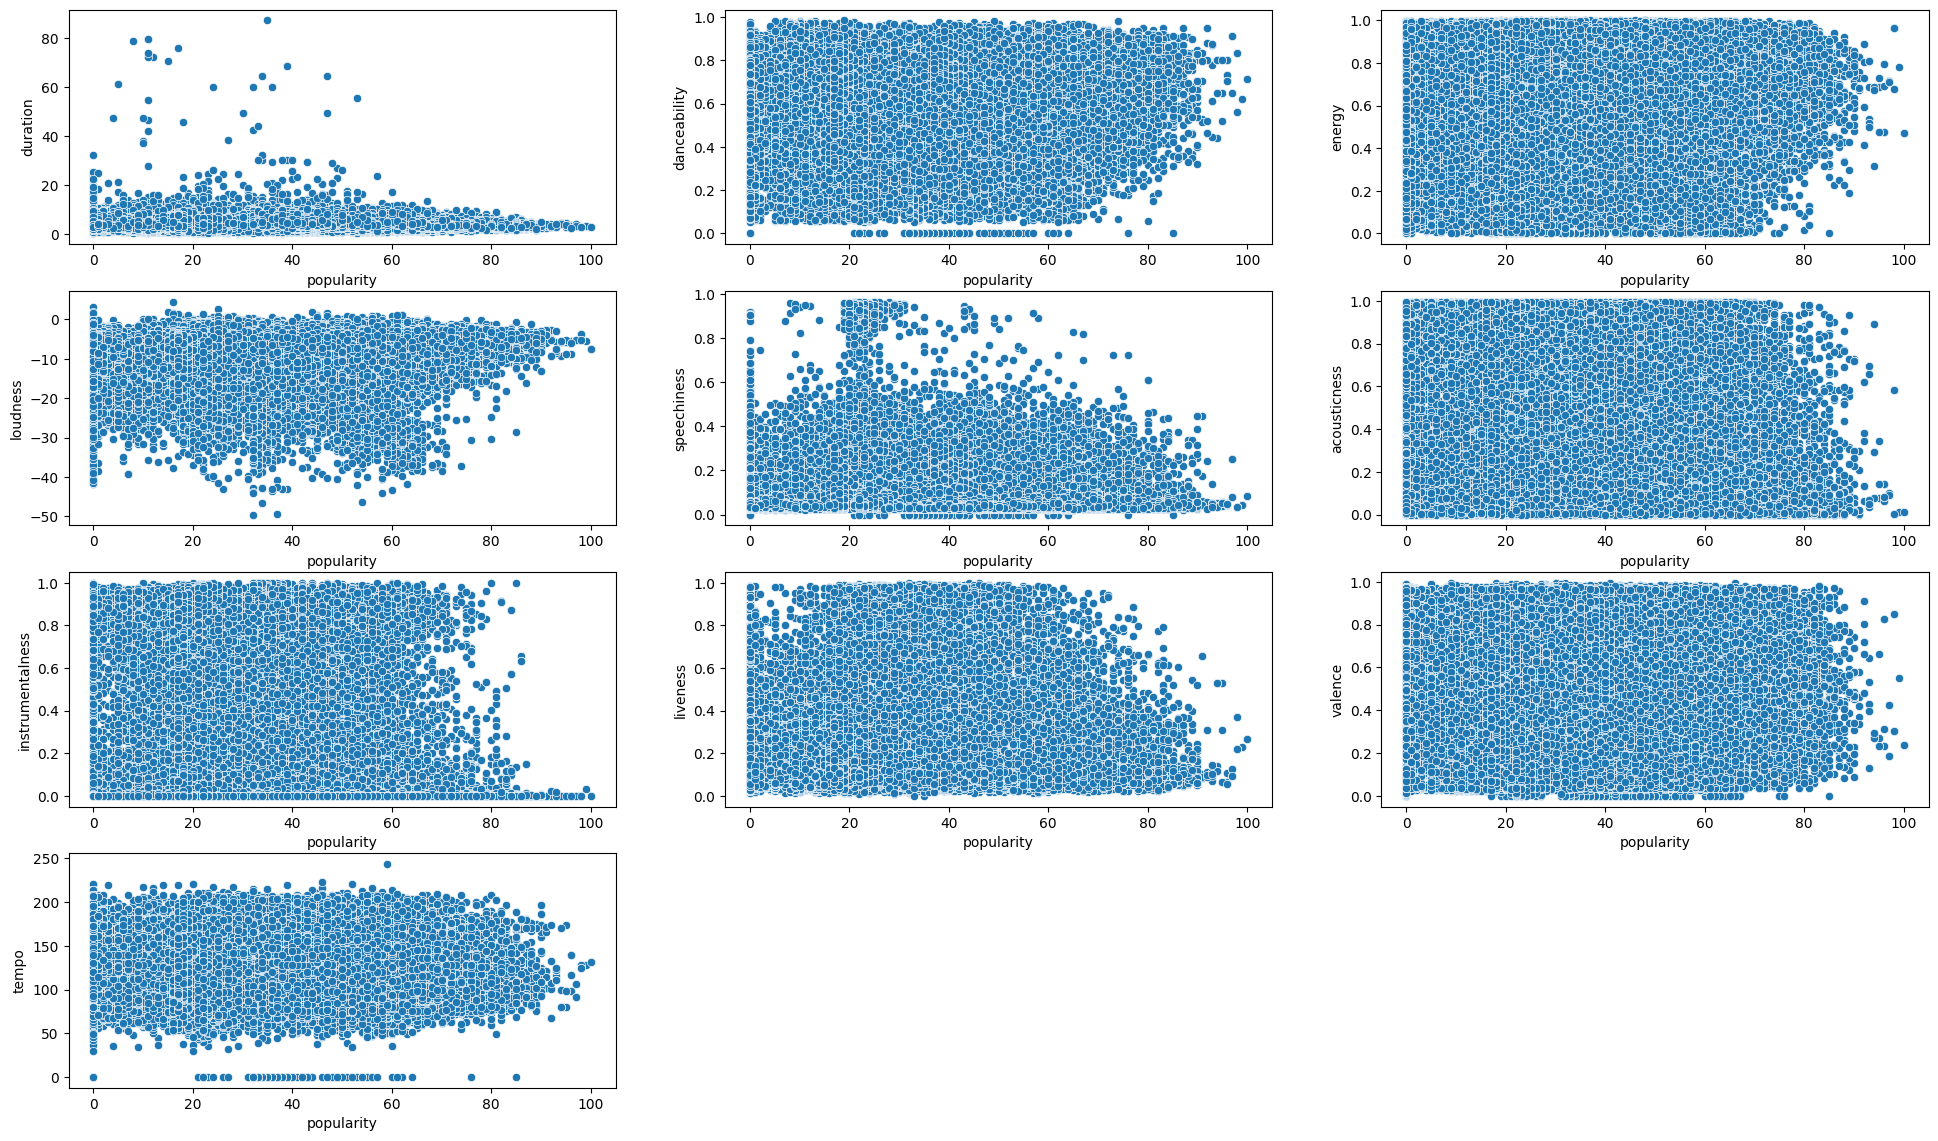

In [145]:
fig = plt.figure(figsize=(24,14))
gs = fig.add_gridspec(4,3)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])
ax6 = fig.add_subplot(gs[2,0])
ax7 = fig.add_subplot(gs[2,1])
ax8 = fig.add_subplot(gs[2,2])
ax9 = fig.add_subplot(gs[3,0])



sns.scatterplot(x=df['popularity'],y=df['duration'],ax=ax0)
sns.scatterplot(x=df['popularity'],y=df['danceability'],ax=ax1)
sns.scatterplot(x=df['popularity'],y=df['energy'],ax=ax2)
sns.scatterplot(x=df['popularity'],y=df['loudness'],ax=ax3)
sns.scatterplot(x=df['popularity'],y=df['speechiness'],ax=ax4)
sns.scatterplot(x=df['popularity'],y=df['acousticness'],ax=ax5)
sns.scatterplot(x=df['popularity'],y=df['instrumentalness'],ax=ax6)
sns.scatterplot(x=df['popularity'],y=df['liveness'],ax=ax7)
sns.scatterplot(x=df['popularity'],y=df['valence'],ax=ax8)
sns.scatterplot(x=df['popularity'],y=df['tempo'],ax=ax9)

plt.show()

Наблюдения:
* Пользуются популярностью треки длящиеся не более 5 минут
* Пользуются популярностью треки имеющие громкость от 0 до -10
* Пользуются популярностью инструментальные треки (с малым количеством слов)
* Существуют значения когда параметры равны 0, но они не имеют значительного влияния на популярность

**Странно что есть музыка с tempo = 0, посчитаем сколько их:**

In [114]:
df[df['tempo']==0]['tempo'].count()

157

**Темп = 0 это ошибка? А есть ли еще параметры равные 0? Посчитаем их:**

In [115]:
zero_stats = list()
for i in numerical_features:
    zero_stats.append(df[df[i] == 0][i].count())
zero_stats = pd.Series(data=zero_stats,index=numerical_features)
print(zero_stats)

popularity          16019
danceability          157
energy                  1
key                 13061
loudness                0
mode                41318
speechiness           157
acousticness           39
instrumentalness    38763
liveness                2
valence               176
tempo                 157
time_signature        163
duration                0
dtype: int64


**За исключением категорической mode, фич с разбросом от 0 до 1 и популярности в среднем существует по ~160 нулевых численных значений**

# Кореляции

In [116]:
corr = df[numerical_features].corr()
corr

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration
popularity,1.000000,0.035444,0.001053,-0.003847,0.050420,-0.013948,-0.044930,-0.025458,-0.095147,-0.005397,-0.040522,0.013212,0.031076,-0.007129
danceability,0.035444,1.000000,0.134325,0.036470,0.259076,-0.069224,0.108625,-0.171531,-0.185608,-0.131620,0.477347,-0.050448,0.207219,-0.073435
energy,0.001053,0.134325,1.000000,0.048007,0.761690,-0.078365,0.142508,-0.733908,-0.181880,0.184795,0.258937,0.247852,0.187127,0.058520
key,-0.003847,0.036470,0.048007,1.000000,0.038591,-0.135911,0.020419,-0.040942,-0.006821,-0.001597,0.034099,0.010914,0.015064,0.008123
loudness,0.050420,0.259076,0.761690,0.038591,1.000000,-0.041768,0.060826,-0.589804,-0.433478,0.076897,0.279851,0.212447,0.191992,-0.003475
mode,-0.013948,-0.069224,-0.078365,-0.135911,-0.041768,1.000000,-0.046535,0.095568,-0.049961,0.014004,0.021964,0.000572,-0.024090,-0.035581
speechiness,-0.044930,0.108625,0.142508,0.020419,0.060826,-0.046535,1.000000,-0.002184,-0.089617,0.205218,0.036637,0.017274,-0.000011,-0.062605
acousticness,-0.025458,-0.171531,-0.733908,-0.040942,-0.589804,0.095568,-0.002184,1.000000,0.104033,-0.020693,-0.107081,-0.208231,-0.176142,-0.103770
instrumentalness,-0.095147,-0.185608,-0.181880,-0.006821,-0.433478,-0.049961,-0.089617,0.104033,1.000000,-0.079896,-0.324310,-0.050328,-0.082580,0.124364
liveness,-0.005397,-0.131620,0.184795,-0.001597,0.076897,0.014004,0.205218,-0.020693,-0.079896,1.000000,0.019093,0.000603,-0.023649,0.010308


Построим матрицу корелляций:

<Axes: >

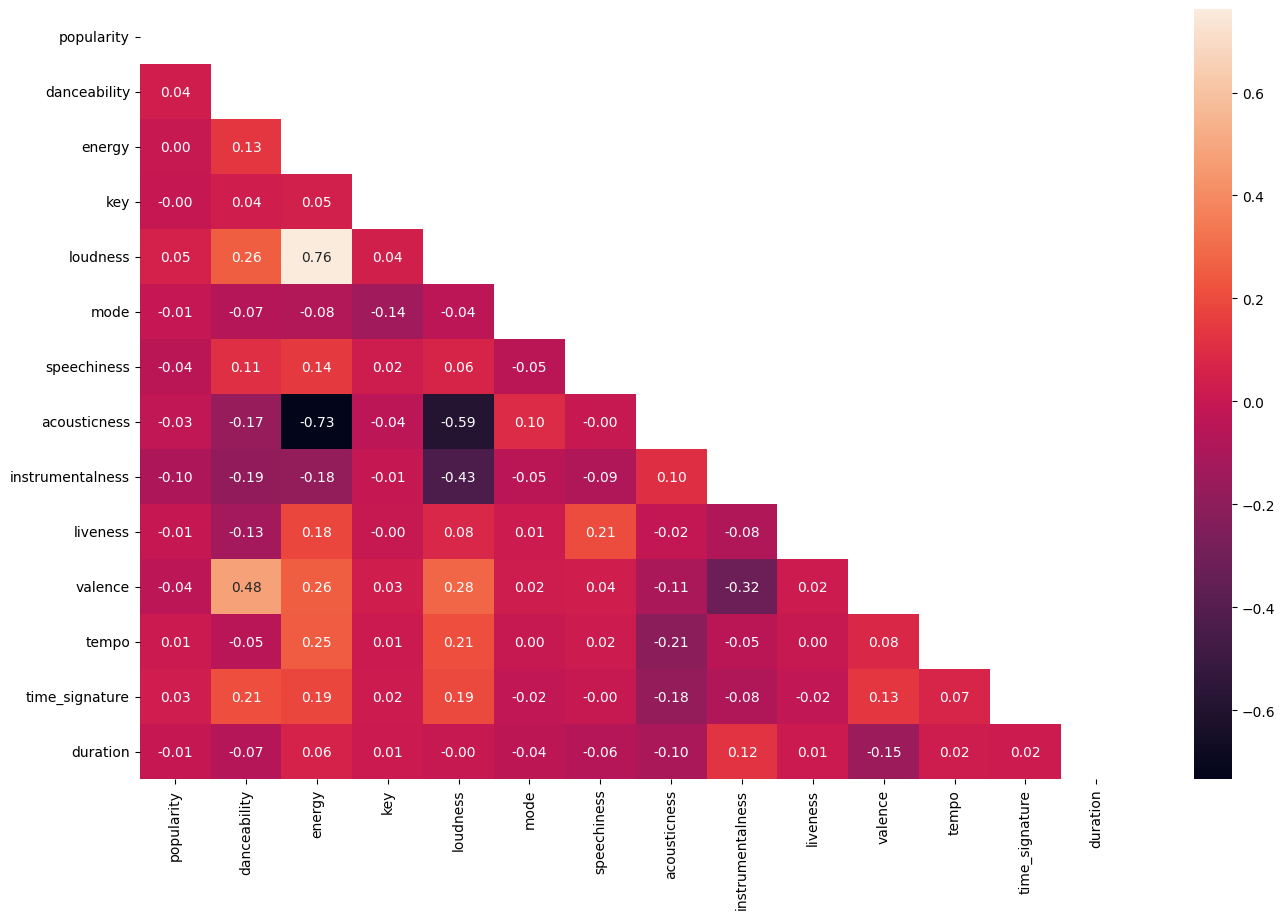

In [117]:
fig = plt.figure(figsize=(16,10))
mask = np.triu(corr)
sns.heatmap(corr,annot=True,fmt='.2f',mask=mask)

Чем больше значение тем больше корелляция, отрицательные значения - обратная корелляция

Важные корреляции для популярности:
* instrumentalness
* loudness
* danceability
* valence

Другие заметные корелляции:
* Высокая кореляция энергии и громкости
* Высокая отрицательная кореляция между акустикой и параметрами энергии и громкости
* Средняя отрицательная корелляция между инструментальностью и громкостью

# **Feature engineering**

Energy имеет высокую корелляцию с loudness и acousticness, создадим новую фичу на их основе

In [118]:
df['loud_energy'] = (df['energy'] + df['loudness']) / 2
df['acoustic_energy'] = (df['energy'] + df['acousticness']) / 2

Посчитаем их корелляцию с popularity

In [119]:
df[['popularity','loud_energy','acoustic_energy']].corr()['popularity']

popularity         1.000000
loud_energy        0.048597
acoustic_energy   -0.036287
Name: popularity, dtype: float64

**Обработка категориальных значений**

In [120]:
print(categorical_features)

['artists', 'album_name', 'track_genre']


Датасет содержит огромное количество альбомов и музыкантов, если закодировать их используя one hot encoding, датасет раздуется до огромных масштабов, поэтому придется опустить эти столбцы

In [121]:
df = df.drop(['artists','album_name'],axis = 1)
categorical_features = ['track_genre']

Жанров же не настолько много, и они существенно важнее, оставим их и закодируем

In [122]:
encoded = pd.get_dummies(df[['track_genre']],dtype=int)
df = df.join(encoded)
df = df.drop(['track_genre'], axis=1)

Также закодируем explicit в int

In [123]:
df["explicit"] = df["explicit"].astype(int)

**Нормализация и предобработка**

In [124]:
X = df.drop(['popularity'], axis=1)
y = df['popularity']

In [125]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# **Модели**

In [126]:
from sklearn.model_selection import GridSearchCV

**Линейная регрессия**

In [127]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()


model.fit(X_train, y_train)

print(mean_squared_error(y_test, model.predict(X_test)))

1.0241110312529621e+22


(здесь потери не равны 1, обратите внимание на e+22 в конце, они наоборот астрономические)

**Desision tree**

In [128]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()

min_samples_split = [2,4,8,16]
param = {'min_samples_split': min_samples_split}

grid = GridSearchCV(estimator=model,
                   param_grid=param,
                    scoring='neg_mean_squared_error',
                    cv=5
                   )

grid.fit(X_train, y_train)

print(grid.best_score_)
print(grid.best_params_)

-417.595926402626
{'min_samples_split': 16}


Здесь MSE отрицаетелен, т.к. GridSearchCV выводит метрики в виде больше - лучше, поэтому потери выводятся как отрицательные числа

**XGBoost**

In [129]:
from xgboost import XGBRegressor

model = XGBRegressor()

model.fit(X_train,y_train)

print(mean_squared_error(y_test, model.predict(X_test)))

410.70967218166953


**Нейронная сеть**

Epoch 1/40


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2280/2280 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 558.7343 - val_loss: 373.3742
Epoch 2/40
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 369.4226 - val_loss: 367.5233
Epoch 3/40
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 362.1745 - val_loss: 364.5046
Epoch 4/40
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 355.0415 - val_loss: 361.6382
Epoch 5/40
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 353.0923 - val_loss: 358.4067
Epoch 6/40
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 351.7769 - val_loss: 358.8104
Epoch 7/40
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 351.2029 - val_loss: 356.2185
Epoch 8/40
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 347.6022 - val_loss: 357.1969
Epoch 9/40
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 349.0808 - val_loss: 358.6197
Epoch 10/40
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 344.6265 - val_loss: 355.8265
Epoch 11/40
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 345.9144 - val_loss: 355.65

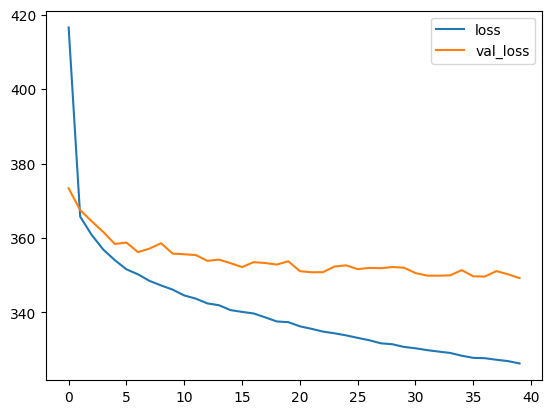

In [130]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='relu'))

model.compile(optimizer='adam', loss='mean_squared_error')

fit_model = model.fit(X_train, y_train, epochs=40, batch_size=32, validation_split=0.2)

loss = model.evaluate(X_test, y_test)

plt.plot(fit_model.history['loss'])
plt.plot(fit_model.history['val_loss'])
plt.legend(['loss','val_loss'])

Потери на валидации значительно больше - типичный признак переобучения, попробуем добавить регуляризацию, на простых датасетах l1 работает лучше, попробуем сначала его

Epoch 1/40
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 623.2449 - val_loss: 373.4938
Epoch 2/40
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 370.1419 - val_loss: 368.8345
Epoch 3/40
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 363.7292 - val_loss: 365.6324
Epoch 4/40
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 358.6325 - val_loss: 364.1351
Epoch 5/40
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 354.0288 - val_loss: 359.6915
Epoch 6/40
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 356.3640 - val_loss: 360.4134
Epoch 7/40
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 348.7928 - val_loss: 359.2124
Epoch 8/40
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 350.6155 - val_loss: 358.4229
Epoch 9/40
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 347.0010 - val_loss: 354.5872
Epoch 10/40
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 344.7932 - val_loss: 361.0157
Epoch 11/40
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 344.0988 - val_l

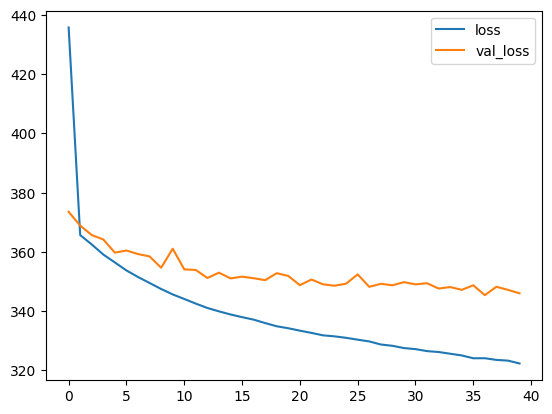

In [131]:
from keras.regularizers import l1

model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer= l1(1e-5)))
model.add(Dense(16, activation='relu', kernel_regularizer= l1(1e-5)))
model.add(Dense(8, activation='relu', kernel_regularizer= l1(1e-5)))
model.add(Dense(1, activation='relu', kernel_regularizer= l1(1e-5)))

model.compile(optimizer='adam', loss='mean_squared_error')

fit_model = model.fit(X_train, y_train, epochs=40, batch_size=32, validation_split=0.2)

loss = model.evaluate(X_test, y_test)

plt.plot(fit_model.history['loss'])
plt.plot(fit_model.history['val_loss'])
plt.legend(['loss','val_loss'])

Разница - в пределах случайных отклонений, попробуем добавить дропаут

Epoch 1/40
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 605.8077 - val_loss: 374.4785
Epoch 2/40
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 412.4754 - val_loss: 373.2789
Epoch 3/40
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 406.7683 - val_loss: 373.9605
Epoch 4/40
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 398.6309 - val_loss: 364.2235
Epoch 5/40
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 398.2980 - val_loss: 361.1194
Epoch 6/40
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 385.0577 - val_loss: 359.6232
Epoch 7/40
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 388.9386 - val_loss: 359.4255
Epoch 8/40
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 384.9701 - val_loss: 358.0379
Epoch 9/40
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 384.0806 - val_loss: 364.7281
Epoch 10/40
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 379.3751 - val_loss: 357.7959
Epoch 11/40
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 377.0408 - val_l

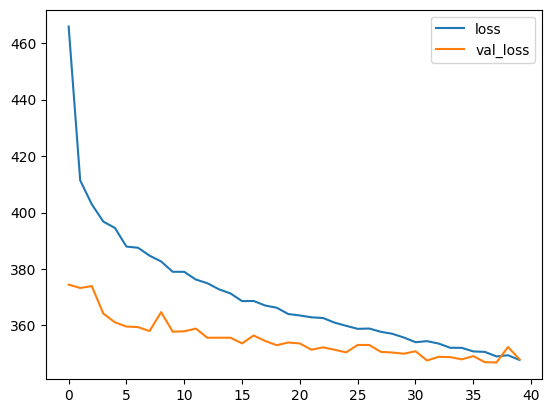

In [132]:
from keras.layers import Dropout

model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer= l1(1e-5)))
model.add(Dropout(0.1))
model.add(Dense(16, activation='relu', kernel_regularizer= l1(1e-5)))
model.add(Dropout(0.1))
model.add(Dense(8, activation='relu', kernel_regularizer= l1(1e-5)))
model.add(Dropout(0.1))
model.add(Dense(1, activation='relu', kernel_regularizer= l1(1e-5)))

model.compile(optimizer='adam', loss='mean_squared_error')

fit_model = model.fit(X_train, y_train, epochs=40, batch_size=32, validation_split=0.2)

loss = model.evaluate(X_test, y_test)

plt.plot(fit_model.history['loss'])
plt.plot(fit_model.history['val_loss'])
plt.legend(['loss','val_loss'])

Есть прогресс, валидация стала ниже потерь и теперь они примерно на одном уровне, увеличим количество эпох чтобы посмотреть продолжится ли тенденция, за одно увеличим batch_size чтобы тренировка шла побыстрее 

Epoch 1/100
570/570 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 938.0452 - val_loss: 375.4214
Epoch 2/100
570/570 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 430.9323 - val_loss: 371.8545
Epoch 3/100
570/570 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 410.3664 - val_loss: 370.7797
Epoch 4/100
570/570 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 411.0446 - val_loss: 368.4139
Epoch 5/100
570/570 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 405.8600 - val_loss: 367.2934
Epoch 6/100
570/570 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 399.3813 - val_loss: 365.0858
Epoch 7/100
570/570 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 404.0011 - val_loss: 365.6373
Epoch 8/100
570/570 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 393.2405 - val_loss: 365.0717
Epoch 9/100
570/570 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 395.9093 - val_loss: 363.9551
Epoch 10/100
570/570 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 400.2704 - val_loss: 362.2681
Epoch 11/100
570/570 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 392.8838 - val_loss: 363.83

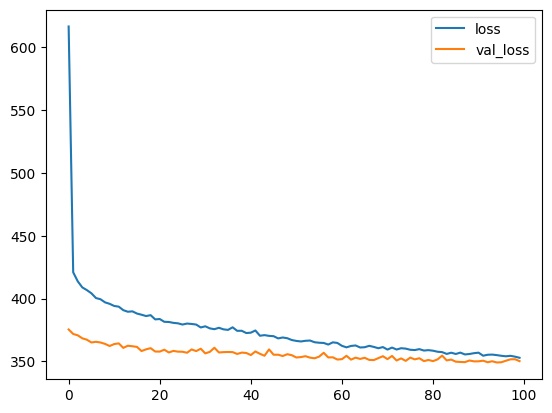

In [133]:
from keras.layers import Dropout

model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer= l1(1e-5)))
model.add(Dropout(0.1))
model.add(Dense(16, activation='relu', kernel_regularizer= l1(1e-5)))
model.add(Dropout(0.1))
model.add(Dense(8, activation='relu', kernel_regularizer= l1(1e-5)))
model.add(Dropout(0.1))
model.add(Dense(1, activation='relu', kernel_regularizer= l1(1e-5)))

model.compile(optimizer='adam', loss='mean_squared_error')

fit_model = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_split=0.2)

loss = model.evaluate(X_test, y_test)

plt.plot(fit_model.history['loss'])
plt.plot(fit_model.history['val_loss'])
plt.legend(['loss','val_loss'])

Отлично, графики сошлись и дальше тренировка не идет, значит мы достигли оптимального уровня тренировки на данных настройках

**Лучшая - NN**

# **Кросс-валидация**

In [139]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer= l1(1e-5)))
model.add(Dropout(0.1))
model.add(Dense(16, activation='relu', kernel_regularizer= l1(1e-5)))
model.add(Dropout(0.1))
model.add(Dense(8, activation='relu', kernel_regularizer= l1(1e-5)))
model.add(Dropout(0.1))
model.add(Dense(1, activation='relu', kernel_regularizer= l1(1e-5)))

model.compile(optimizer='adam', loss='mean_squared_error')

kf = KFold(n_splits=5)

count = 1
MSE_sum = 0
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model.fit(X_train, y_train, epochs=100, batch_size=1024, validation_split=0, verbose = 0)

    prediction = model.predict(X_test)

    print('Fold:', count)
    count += 1
    MSE = mean_squared_error(y_test, prediction)
    MAE = mean_absolute_error(y_test, prediction)
    MSE_sum += MSE
    print('MSE: ', MSE)
    print('MAE: ', MAE)
print('Mean MSE:', MSE_sum / 5)
print('Mean RMSE:', (MSE_sum / 5) ** 0.5)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Fold: 1
MSE:  492.7722126618302
MAE:  18.892193119567736
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Fold: 2
MSE:  346.3348317777633
MAE:  14.13858375039017
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Fold: 3
MSE:  374.9459298597518
MAE:  14.42216229788044
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Fold: 4
MSE:  420.5745104440019
MAE:  15.178919271335268
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Fold: 5
MSE:  294.4519495810812
MAE:  12.124226426570017
Mean MSE: 385.81588686488567
Mean RMSE: 19.642196589609974


**Заметим большой разброс точности, дело в отсутствии рандомизации при кросс-валидации, поэтому сильно влияет порядок данных в датасете**